In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Loading and analyzing data

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
df = pd.DataFrame(dict(sepal_length=[set_of_data[0] for set_of_data in iris['data']], 
                       sepal_width=[set_of_data[1] for set_of_data in iris['data']],
                       petal_length=[set_of_data[2] for set_of_data in iris['data']],
                       petal_width=[set_of_data[3] for set_of_data in iris['data']],
                       target=iris['target']))

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


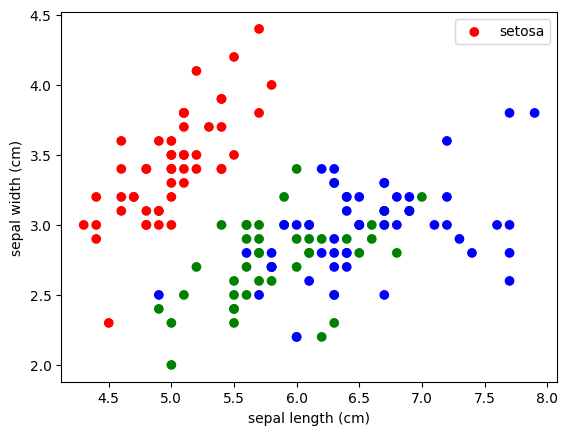

In [12]:
colors = {0:'r', 1:'g', 2:'b'}

plt.scatter(df['sepal_length'], 
            df['sepal_width'],
            c=df['target'].map(colors))

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend([name for name in iris['target_names']])
plt.show()

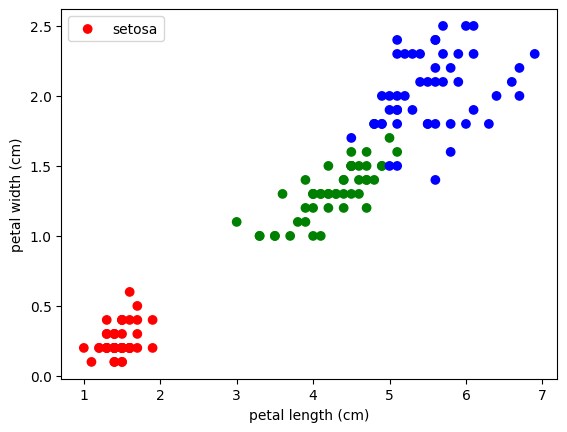

In [13]:
plt.scatter(df['petal_length'], 
            df['petal_width'],
            c=df['target'].map(colors))

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend([name for name in iris['target_names']])
plt.show()

In [14]:
X = iris['data']
y = iris['target']

In [15]:
dataset = X[:150:15]
output = y[:150:15]

In [16]:
dataset

array([[5.1, 3.5, 1.4, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [4.8, 3.1, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5. , 2. , 3.5, 1. ],
       [6.6, 3. , 4.4, 1.4],
       [5.5, 2.6, 4.4, 1.2],
       [7.6, 3. , 6.6, 2.1],
       [6.9, 3.2, 5.7, 2.3],
       [7.7, 3. , 6.1, 2.3]])

In [17]:
output

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])

In [18]:
def euclidean_distance(row1, row2):
    return np.linalg.norm(row2 - row1)

In [19]:
for vector in dataset:
    print(euclidean_distance(vector, dataset[5]))

3.59722114972099
3.4899856733230297
3.539774004085572
3.66742416417845
2.128379665379276
0.0
1.1874342087037915
2.5159491250818244
1.6217274740226855
2.2158519806160335


In [20]:
def get_neighbors(train_set, labels, test_row, num_neighbors):
    distances = []
    neighbors = []
    vectors = train_set.tolist()
    labels_list = labels.tolist()
    
    for i in range(len(vectors)):
        distances.append(euclidean_distance(test_row, train_set[i]))
    
    for i in range(num_neighbors):
        neighbor_index = distances.index(min(distances))
        distance = distances.pop(neighbor_index)
        neighbor = vectors.pop(neighbor_index)
        label = labels_list.pop(neighbor_index)
        
        neighbors.append((np.asarray(neighbor), distance, label))
        
    return neighbors

In [21]:
neighbors = get_neighbors(dataset, output, dataset[5], 3)

for neighbor in neighbors:
    print(neighbor)

(array([6.6, 3. , 4.4, 1.4]), 0.0, 1)
(array([5.5, 2.6, 4.4, 1.2]), 1.1874342087037915, 1)
(array([6.9, 3.2, 5.7, 2.3]), 1.6217274740226855, 2)


In [22]:
from collections import Counter

def predict_classification(train_set, labels, test_row, num_neighbors):
    predicts = []
    neighbors = get_neighbors(train_set, labels, test_row, num_neighbors)
    
    for neighbor in neighbors:
        predicts.append(neighbor[2])
    count = Counter(predicts)
    
    return count.most_common()[0][0]

In [23]:
prediction = predict_classification(dataset, output, dataset[5], 3)
print('Expected %s, Got %s.' % (output[5], prediction))

Expected 1, Got 1.


In [24]:
def k_nearest_neighbors(train_set, labels, test, num_neighbors):
    predicts = []
    
    for test_row in test:
        predicts.append(predict_classification(train_set, labels, test_row, num_neighbors))
        
    return predicts

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
predictions = k_nearest_neighbors(X_train, y_train, X_test, 4)

In [27]:
def get_accuracy(y_preds, y_true):
    count_of_right_predictions = 0
    
    for i in range(len(y_preds)):
        if y_preds[i] == y_true[i]:
            count_of_right_predictions += 1
            
    return count_of_right_predictions / len(y_true)

In [28]:
get_accuracy(predictions, y_test)

0.9

In [29]:
accuracy_scores = []

for num_of_neigbors in range(1, 61):
    predictions = k_nearest_neighbors(X_train, y_train, X_test, num_of_neigbors)
    accuracy_scores.append(get_accuracy(predictions, y_test))

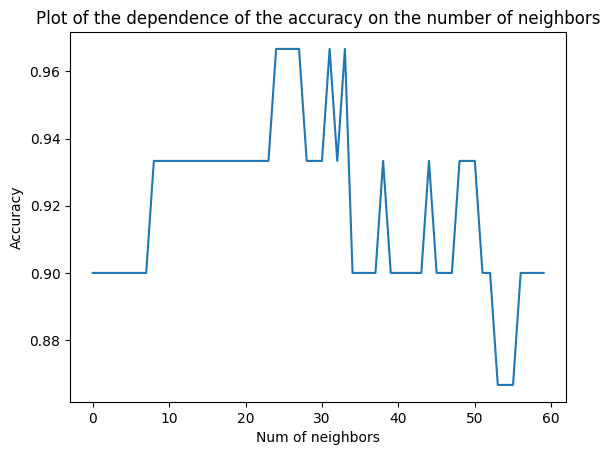

In [30]:
plt.plot(accuracy_scores)
plt.title('Plot of the dependence of the accuracy on the number of neighbors')
plt.xlabel('Num of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Class for complete solution of this task with different parameters

In [31]:
from collections import Counter

class KNN:
    def __init__(self, num_neighbors, train_set, labels, test_set, labels_test=None):
        self.train_set = train_set
        self.labels = labels
        self.test_set = test_set
        self.num_neighbors = num_neighbors
        self.labels_test = labels_test
        
    def euclidean_distance(self, row1, row2):
        return np.linalg.norm(row2 - row1)
    
    def get_neighbors(self, test_row):
        distances = []
        neighbors = []
        vectors = self.train_set.tolist()
        labels_list = self.labels.tolist()

        for i in range(len(vectors)):
            distances.append(self.euclidean_distance(test_row, self.train_set[i]))

        for i in range(self.num_neighbors):
            neighbor_index = distances.index(min(distances))
            distance = distances.pop(neighbor_index)
            neighbor = vectors.pop(neighbor_index)
            label = labels_list.pop(neighbor_index)

            neighbors.append((np.asarray(neighbor), distance, label))

        return neighbors
    
    def predict_classification(self, test_row):
        predicts = []
        neighbors = self.get_neighbors(test_row)

        for neighbor in neighbors:
            predicts.append(neighbor[2])
        count = Counter(predicts)

        return count.most_common()[0][0]
    
    def k_nearest_neighbors(self):
        predicts = []

        for test_row in self.test_set:
            predicts.append(self.predict_classification(test_row))

        return predicts
    
    def get_accuracy(self, y_preds):
        count_of_right_predictions = 0

        for i in range(len(y_preds)):
            if y_preds[i] == self.labels_test[i]:
                count_of_right_predictions += 1

        return count_of_right_predictions / len(self.labels_test)
    
    def get_solution(self):
        predicts = self.k_nearest_neighbors()
        print(f'Predictions for test set: {predicts}')
        
        if self.labels_test is not None:
            print(f'KNN accuracy with {self.num_neighbors} neighbors: {self.get_accuracy(predicts)}')

In [32]:
KNN(4, X_train, y_train, X_test, y_test).get_solution()

Predictions for test set: [2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1]
KNN accuracy with 4 neighbors: 0.9


## Sklearn KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
knn.predict(X_test)

array([2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2, 1])

### Let's compare the results with logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

In [37]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [38]:
logistic_regression.predict(X_test)

array([2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2, 1])

In [39]:
get_accuracy(knn.predict(X_test), y_test)

0.9

In [40]:
get_accuracy(logistic_regression.predict(X_test), y_test)

0.9333333333333333

In this case, the algorithm to the k nearest neighbor showed itself better.

## Decision Trees

### Decision tree classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
tree_classifier = DecisionTreeClassifier(max_depth=20)

In [43]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [44]:
tree_classifier.predict(X_test)

array([2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2, 1])

In [45]:
get_accuracy(y_preds=tree_classifier.predict(X_test), y_true=y_test)

0.9333333333333333

In [63]:
accuracy_list = []
max_depth_list = [i for i in range(1, 51)]

results = {'accuracy': [], 
           'max_depth': []}

for max_depth in max_depth_list:
    results['max_depth'].append(max_depth)

    tree_classifier = DecisionTreeClassifier(max_depth=max_depth)
    tree_classifier.fit(X_train, y_train)
    results['accuracy'].append(get_accuracy(tree_classifier.predict(X_test), y_test))
        
table_with_results = pd.DataFrame(data=results)

table_with_results

,accuracy,max_depth
0,0.566667,1
1,0.900000,2
2,0.933333,3
3,0.933333,4
4,0.933333,5
5,0.933333,6
6,0.933333,7
7,0.933333,8
8,0.933333,9
9,0.933333,10


In [64]:
table_with_results[table_with_results['accuracy'] > 9.4]

,accuracy,max_depth


### Random forest classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=1, min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [57]:
accuracy_list = []
n_estimators_list = [i for i in range(1, 26)]
max_depth_list = [i for i in range(1, 21)]

results = {'accuracy': [], 
           'n_estimators': [], 
           'max_depth': []}

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        results['n_estimators'].append(n_estimators)
        results['max_depth'].append(max_depth)
        
        random_forest_clf = RandomForestClassifier(n_estimators=n_estimators, 
                                                   max_depth=max_depth)
        random_forest_clf.fit(X_train, y_train)
        results['accuracy'].append(get_accuracy(random_forest_clf.predict(X_test), y_test))
        
table_with_results = pd.DataFrame(data=results)

table_with_results[table_with_results['accuracy'] > 0.9]

,accuracy,n_estimators,max_depth
1,0.966667,1,2
6,0.933333,1,7
8,0.966667,1,9
9,0.933333,1,10
10,0.966667,1,11
...,...,...,...
494,0.933333,25,15
495,0.933333,25,16
497,0.966667,25,18
498,0.933333,25,19


In [58]:
table_with_results[table_with_results['accuracy'] == 1.0]

,accuracy,n_estimators,max_depth
70,1.0,4,11
77,1.0,4,18
116,1.0,6,17


### Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
accuracy_list = []
n_estimators_list = [i for i in range(1, 26)]
max_depth_list = [i for i in range(1, 21)]
learning_rate_list = [0.0001, 0.001, 0.01, 0.1]

results = {'accuracy': [], 
           'n_estimators': [], 
           'max_depth': [],
           'learning_rate': []}

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for learning_rate in learning_rate_list:
            results['n_estimators'].append(n_estimators)
            results['max_depth'].append(max_depth)
            results['learning_rate'].append(learning_rate)

            random_forest_clf = RandomForestClassifier(n_estimators=n_estimators, 
                                                       max_depth=max_depth, 
                                                       min_samples_split=learning_rate)
            random_forest_clf.fit(X_train, y_train)
            results['accuracy'].append(get_accuracy(random_forest_clf.predict(X_test), y_test))
        
table_with_results = pd.DataFrame(data=results)

table_with_results

,accuracy,n_estimators,max_depth,learning_rate
0,0.566667,1,1,0.0001
1,0.700000,1,1,0.0010
2,0.566667,1,1,0.0100
3,0.700000,1,1,0.1000
4,0.933333,1,2,0.0001
...,...,...,...,...
1995,0.933333,25,19,0.1000
1996,0.933333,25,20,0.0001
1997,0.966667,25,20,0.0010
1998,0.933333,25,20,0.0100


In [62]:
table_with_results[table_with_results['accuracy'] == 1.0]

,accuracy,n_estimators,max_depth,learning_rate
44,1.0,1,12,0.0001
91,1.0,2,3,0.1000
266,1.0,4,7,0.0100
360,1.0,5,11,0.0001
475,1.0,6,19,0.1000
797,1.0,10,20,0.0010
844,1.0,11,12,0.0001
904,1.0,12,7,0.0001
1139,1.0,15,5,0.1000
